In [1]:
pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)

4.10.0


In [3]:
img=cv2.imread('/content/dog.jpeg')

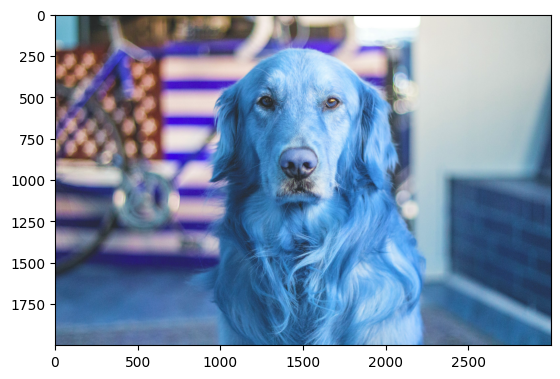

In [4]:
plt.imshow(img)

In [5]:
imgrgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

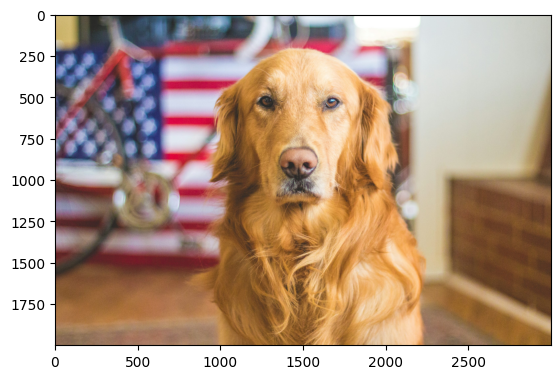

In [6]:
plt.imshow(imgrgb)
plt.show()

In [7]:
imgrgb.shape

(2000, 3000, 3)

In [8]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

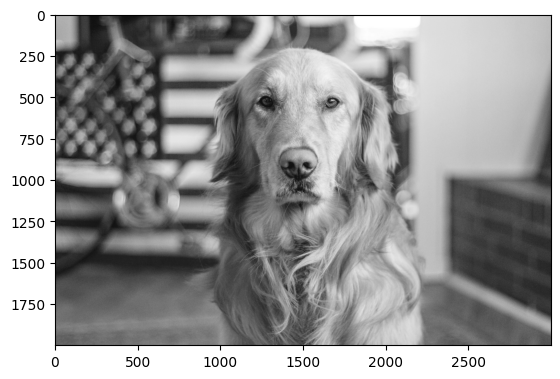

In [9]:
plt.imshow(gray,cmap='gray')
plt.show()

In [10]:
gray.shape

(2000, 3000)

In [11]:
type(gray)

numpy.ndarray

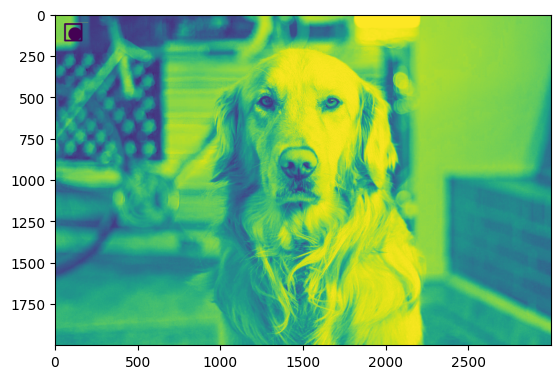

In [23]:
plt.imshow(imgrgb[:,:,0])
plt.show()

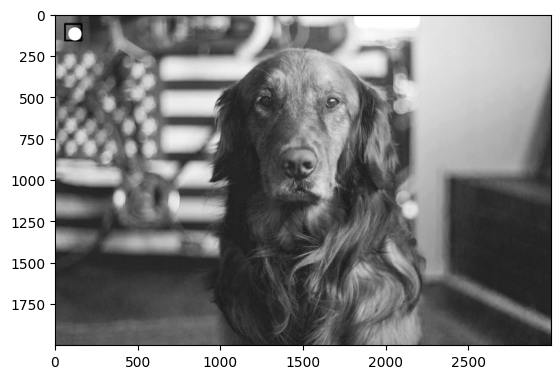

In [24]:
plt.imshow(imgrgb[:,:,2],cmap='gray')
plt.show()

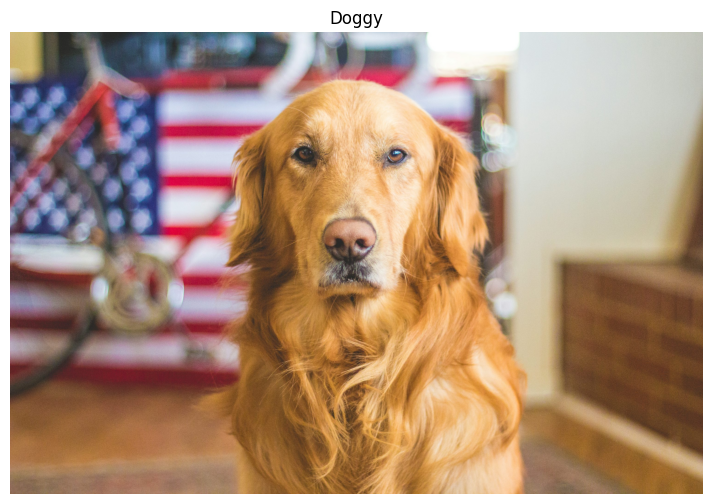

In [14]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.axis('off')
ax.set_title('Doggy')
ax.imshow(imgrgb)
plt.show()

In [15]:
imgrgb.shape

(2000, 3000, 3)

In [16]:
resized = cv2.resize(imgrgb, (300, 300))
resized.shape

(300, 300, 3)

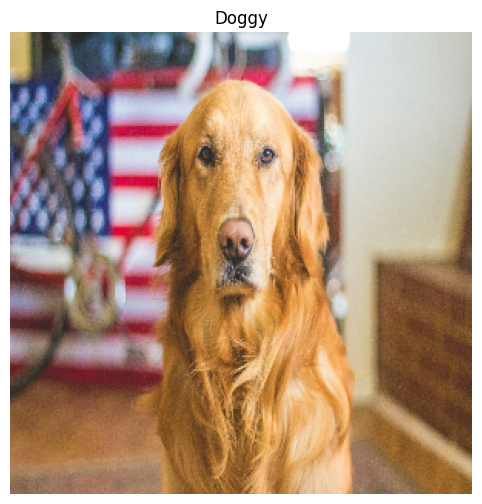

In [17]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.axis('off')
ax.set_title('Doggy')
ax.imshow(resized)
plt.show()

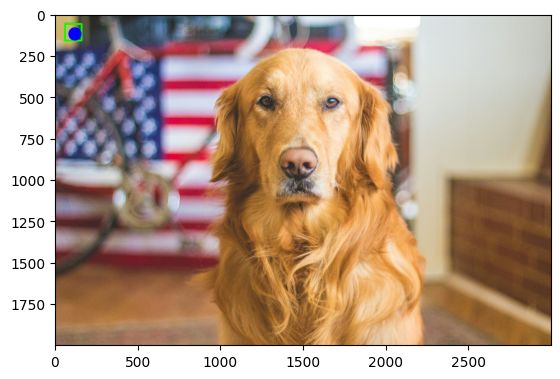

In [18]:
cv2.line(imgrgb,(50,50),(200,50),(255,0,0),1)
cv2.rectangle(imgrgb, (60, 60), (160, 160), (0, 255, 0), 10)
cv2.circle(imgrgb, (120, 120), 40, (0, 0, 255), -1)
plt.imshow(imgrgb)
plt.show()

Q1

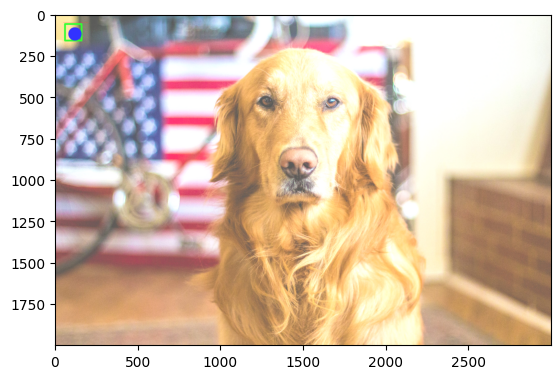

In [30]:
brightness_change = 50
bright_image = cv2.add(imgrgb, np.ones_like(imgrgb) * brightness_change)
plt.imshow(bright_image)
plt.show()

Q2

(-0.5, 2999.5, 1999.5, -0.5)

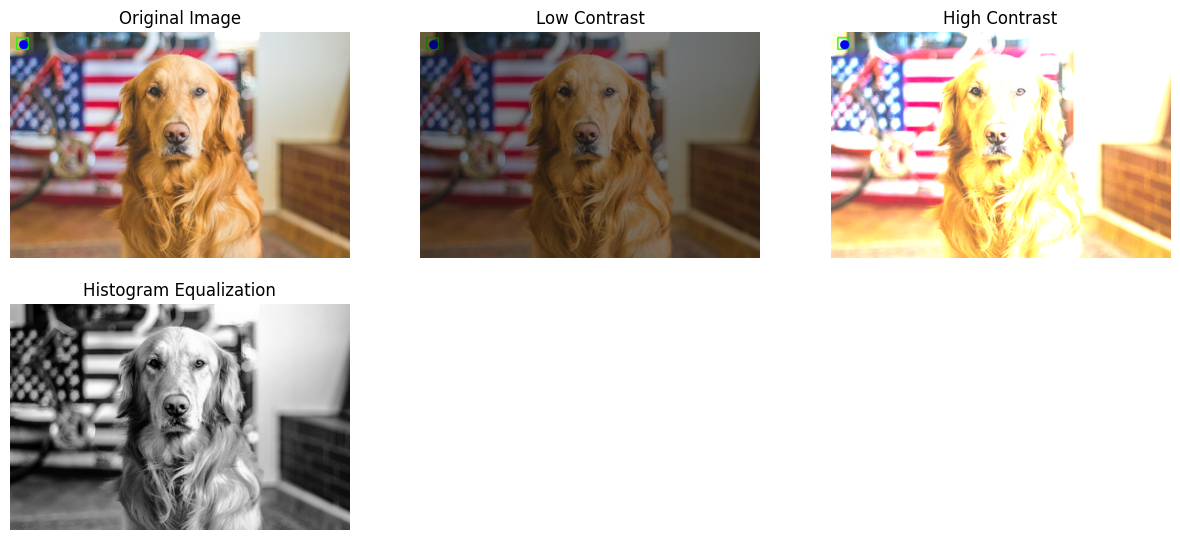

In [26]:
low_contrast = cv2.convertScaleAbs(imgrgb, alpha=0.5, beta=0)  # Reduce contrast
high_contrast = cv2.convertScaleAbs(imgrgb, alpha=2.0, beta=0)  # Increase contrast
hist_eq = cv2.equalizeHist(gray)
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(imgrgb)
plt.axis("off")

# Low Contrast
plt.subplot(3, 3, 2)
plt.title("Low Contrast")
plt.imshow(low_contrast)
plt.axis("off")

# High Contrast
plt.subplot(3, 3, 3)
plt.title("High Contrast")
plt.imshow(high_contrast)
plt.axis("off")

# Histogram Equalization
plt.subplot(3, 3, 4)
plt.title("Histogram Equalization")
plt.imshow(hist_eq, cmap="gray")
plt.axis("off")

Q3

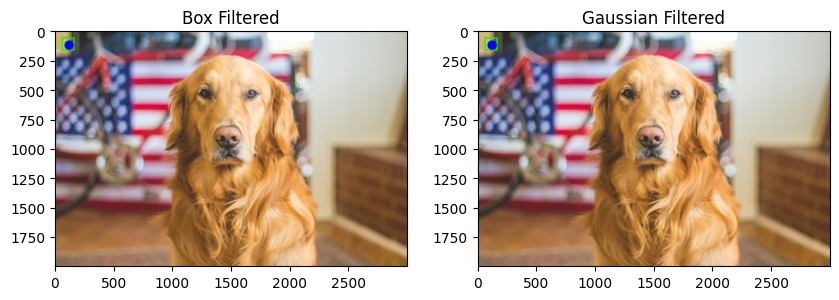

In [27]:
# Box filter
box_filtered = cv2.blur(imgrgb, (5, 5))  # 5x5 kernel

# Gaussian filter
gaussian_filtered = cv2.GaussianBlur(imgrgb, (5, 5), 0)  # Sigma = 0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Box Filtered")
plt.imshow(box_filtered)

plt.subplot(1, 2, 2)
plt.title("Gaussian Filtered")
plt.imshow(gaussian_filtered)
plt.show()

Q4

(2000, 3000, 3)
(2000, 3000, 3)


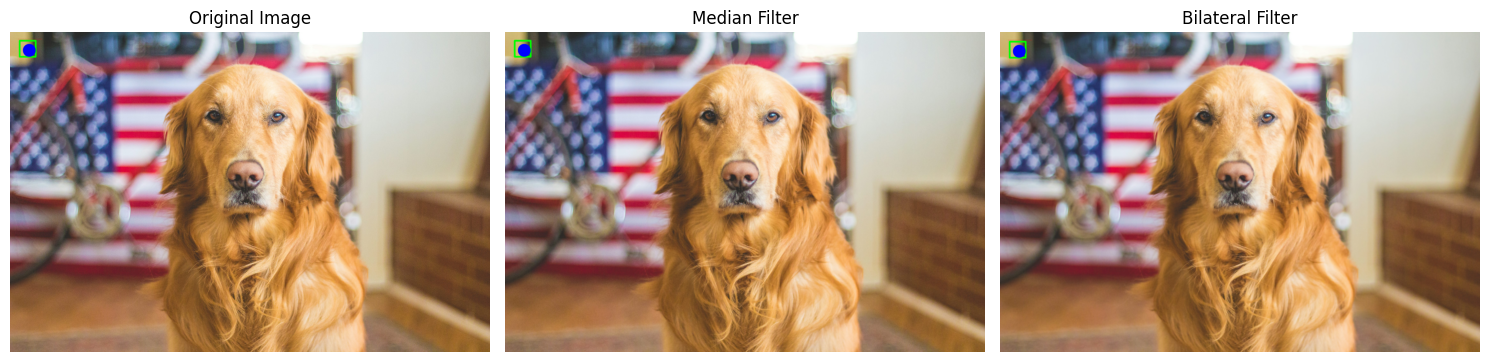

In [32]:
# Median Filter (Non-linear)
median_filtered = cv2.medianBlur(imgrgb, 5)  # 5x5 kernel

# Bilateral Filter (Non-linear, preserves edges)
bilateral_filtered = cv2.bilateralFilter(imgrgb, d=9, sigmaColor=75, sigmaSpace=75)#sigma large hai smooth ke liye

# Plot the results
plt.figure(figsize=(15, 5))
print(bilateral_filtered.shape)
print(median_filtered.shape)
# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(imgrgb)
plt.axis("off")

# Median Filtered Image
plt.subplot(1, 3, 2)
plt.title("Median Filter")
plt.imshow(median_filtered)
plt.axis("off")

# Bilateral Filtered Image
plt.subplot(1, 3, 3)
plt.title("Bilateral Filter")
plt.imshow(bilateral_filtered)
plt.axis("off")

plt.tight_layout()
plt.show()

Q5

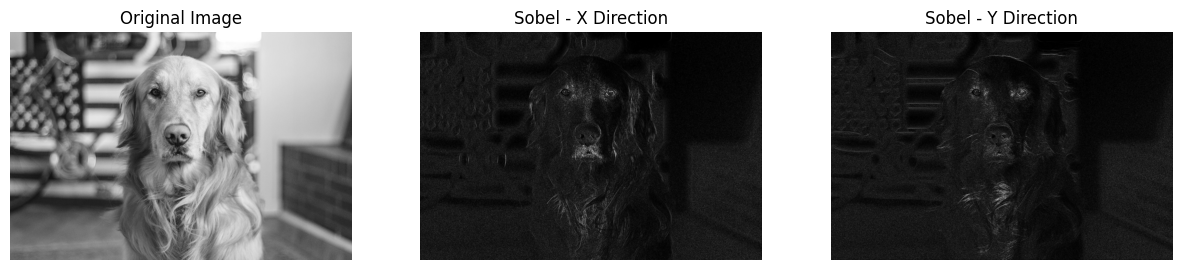

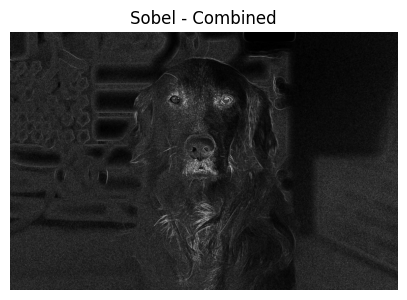

In [33]:
# Apply Sobel filter
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction float64
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Magnitude of gradients

# Normalize
sobel_combined = cv2.convertScaleAbs(sobel_combined)

plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

# Sobel X
plt.subplot(1, 3, 2)
plt.title("Sobel - X Direction")
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.axis("off")

# Sobel Y
plt.subplot(1, 3, 3)
plt.title("Sobel - Y Direction")
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.axis("off")

# Combined Sobel
plt.figure(figsize=(5, 5))
plt.title("Sobel - Combined")
plt.imshow(sobel_combined, cmap='gray')
plt.axis("off")

plt.show()